In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
 df = pd.read_csv(r"C:\Users\HP\Downloads\salaries (1).csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Director,152100,USD,152100,US,0,US,M
1,2025,EX,FT,Director,112700,USD,112700,US,0,US,M
2,2025,MI,FT,Data Scientist,55000,GBP,69620,GB,100,GB,M
3,2025,MI,FT,Data Scientist,50000,GBP,63291,GB,100,GB,M
4,2025,EX,FT,Director,250000,USD,250000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
145753,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
145754,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
145755,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
145756,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
df.drop(columns=['salary', 'salary_currency'], inplace=True, errors='ignore')


In [8]:
print("\nMissing values:\n", df.isnull().sum())
df.dropna(inplace=True)



Missing values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [28]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

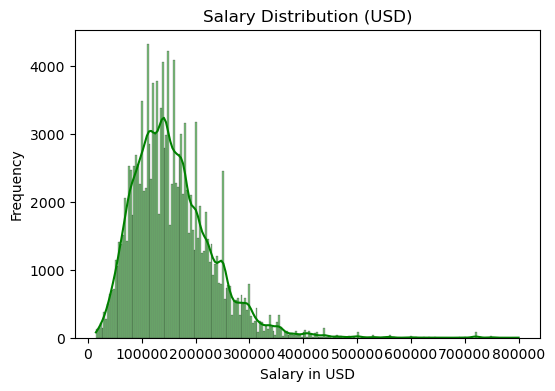

In [10]:
#Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.histplot(df['salary_in_usd'], kde=True, color='green')
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()


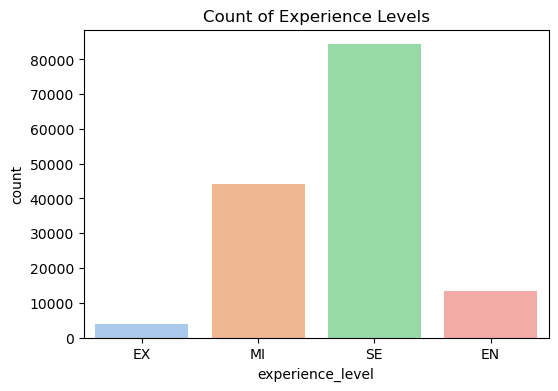

In [12]:
#Count Plot for Experience Level
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='experience_level', palette='pastel')
plt.title("Count of Experience Levels")
plt.show()


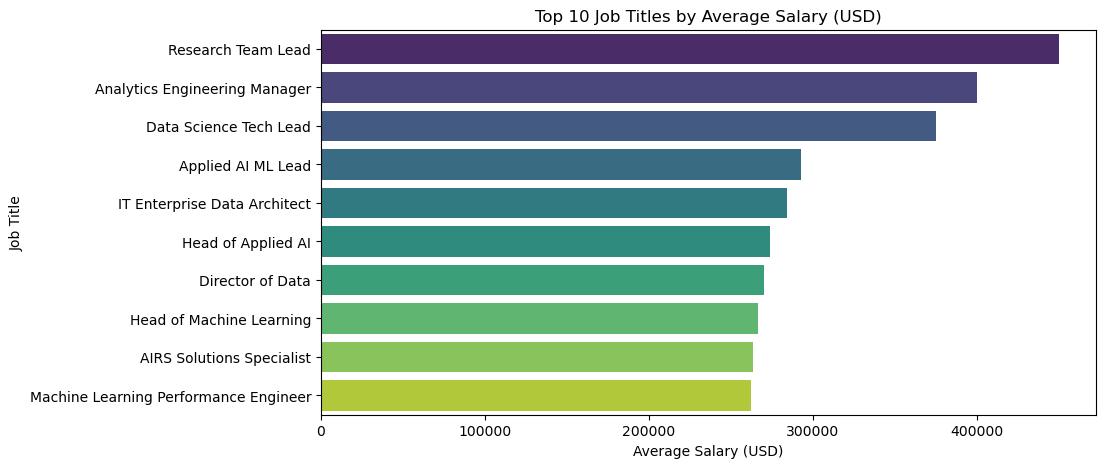

In [14]:
#Average Salary by Job Title
plt.figure(figsize=(10,5))
avg_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='viridis')
plt.title("Top 10 Job Titles by Average Salary (USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.show()

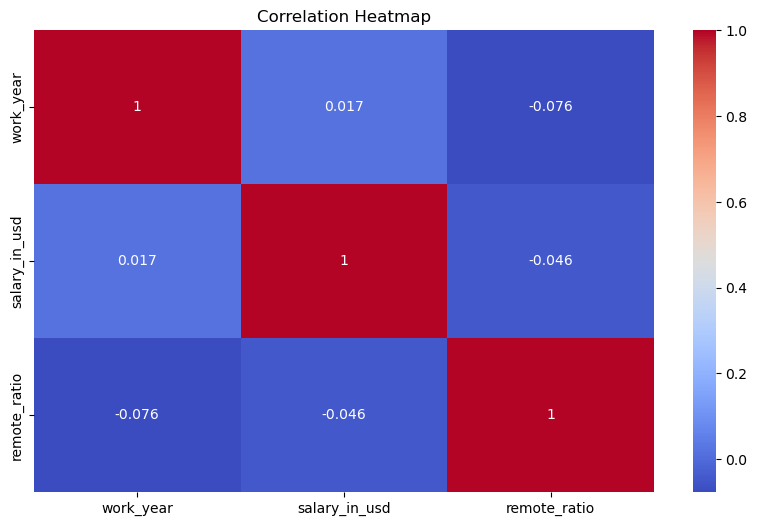

In [16]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [36]:
label = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label.fit_transform(df[col])


In [38]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

results = {}

In [51]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n {name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")



 Linear Regression Results:
Mean Squared Error: 4610911997.22
R2 Score: 0.16

 Decision Tree Results:
Mean Squared Error: 3869630666.79
R2 Score: 0.29

 Random Forest Results:
Mean Squared Error: 3817317385.04
R2 Score: 0.30

 XGBoost Results:
Mean Squared Error: 3817158552.77
R2 Score: 0.30


In [70]:
results_df = pd.DataFrame(results).T
print("\n Model Comparison:\n", results_df)



 Model Comparison:
 Empty DataFrame
Columns: []
Index: []


In [76]:
results[name] = {"MSE": mse, "R2": r2}


In [80]:
results_df = pd.DataFrame(results).T
print(results_df)


                  MSE        R2
XGBoost  3.817159e+09  0.303596


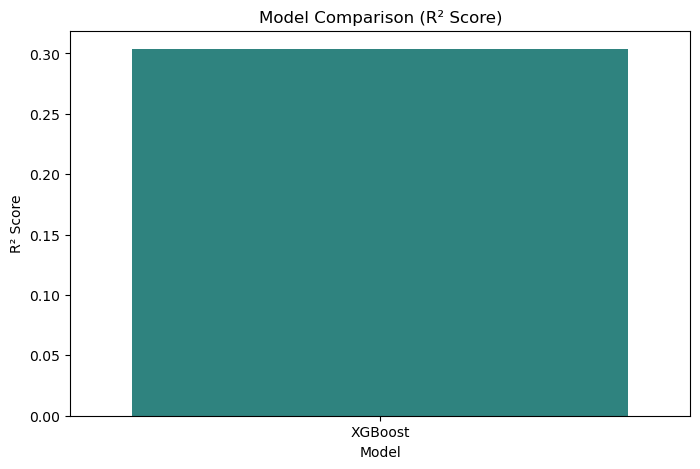

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.show()

In [84]:
best_model_name = results_df["R2"].idxmax()
print(f"\n Best Model: {best_model_name}")



 Best Model: XGBoost



 Best Model: XGBoost


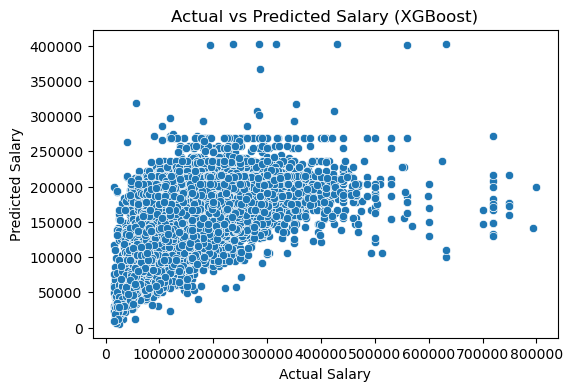

In [90]:
#  Scatter Plot for Best Model
best_model_name = results_df["R2"].idxmax()
print(f"\n Best Model: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)   # 
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted Salary ({best_model_name})")
plt.show()
